In [1]:
import pandas as pd
import numpy as np
 
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
# Importing PCA
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)

Inputs Dataframe shape   : (569, 30)


In [4]:
# Mean
X_mean = X.mean()
X_mean

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

In [5]:
# Standard deviation
X_std = X.std()
X_std

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [6]:
# Standardization
Z = (X - X_mean) / X_std
Z.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


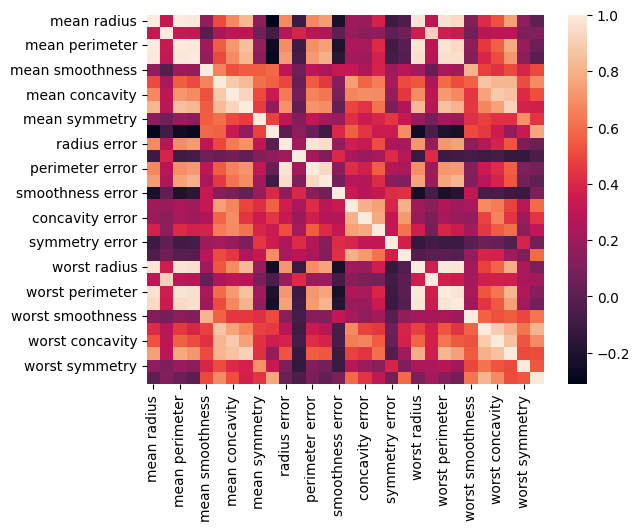

(30, 30)

In [7]:
# covariance
c = Z.cov()
sns.heatmap(c)
plt.show()
c.shape

In [8]:
# eig values and eig vectors of cov matrix
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


### Sort the eigenvalues in descending order

In [9]:
# Index the eigenvalues in descending order 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order 
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

eigenvalues

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

In [10]:
np.cumsum(eigenvalues)

array([13.28160768, 18.9729623 , 21.79091127, 23.77155175, 25.4202823 ,
       26.62763891, 27.30285902, 27.77947616, 28.19637097, 28.54706443,
       28.84098013, 29.1021415 , 29.34349899, 29.50050872, 29.59464368,
       29.67450648, 29.73390552, 29.7865243 , 29.8360019 , 29.8671613 ,
       29.89713419, 29.92457359, 29.94891443, 29.96696944, 29.98245071,
       29.99062835, 29.99752881, 29.99911815, 29.99986696, 30.        ])

In [11]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [12]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

2

In [13]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = cancer['feature_names'],
                             columns = ['PC1','PC2']
                            )
pca_component

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


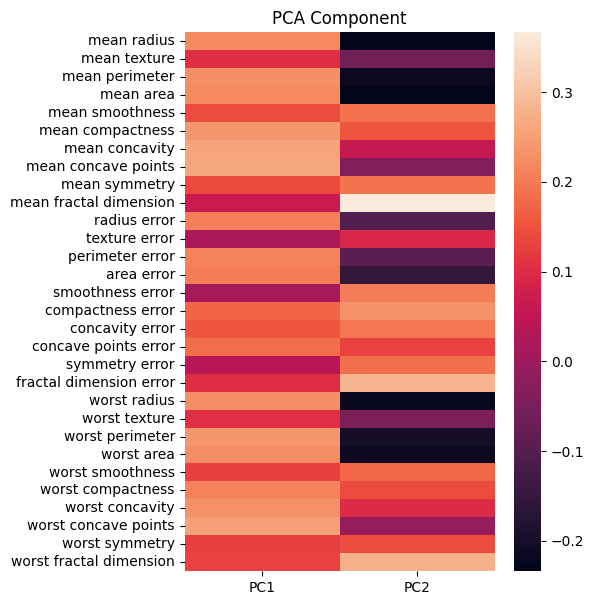

In [14]:
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [15]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


### PCA algorithm using scikit learn with 3 components

In [16]:
# Let's say, components = 2
components_count = 3
pca = PCA(n_components=components_count)
pca.fit(Z)
x_pca2 = pca.transform(Z)
 
# Create the dataframe
df_pca2 = pd.DataFrame(x_pca2, columns=[f'PC{i+1}' for i in range(components_count)])
print(df_pca2)
x_pca2

           PC1        PC2       PC3
0     9.184755   1.946870 -1.122179
1     2.385703  -3.764859 -0.528827
2     5.728855  -1.074229 -0.551263
3     7.116691  10.266556 -3.229948
4     3.931842  -1.946359  1.388545
..         ...        ...       ...
564   6.433655  -3.573673  2.457324
565   3.790048  -3.580897  2.086640
566   1.255075  -1.900624  0.562236
567  10.365673   1.670540 -1.875379
568  -5.470430  -0.670047  1.489133

[569 rows x 3 columns]


array([[ 9.18475521,  1.94687003, -1.12217877],
       [ 2.38570263, -3.76485906, -0.52882737],
       [ 5.72885549, -1.07422859, -0.55126254],
       ...,
       [ 1.25507494, -1.90062436,  0.56223582],
       [10.36567336,  1.67054021, -1.87537919],
       [-5.4704299 , -0.67004722,  1.4891328 ]])

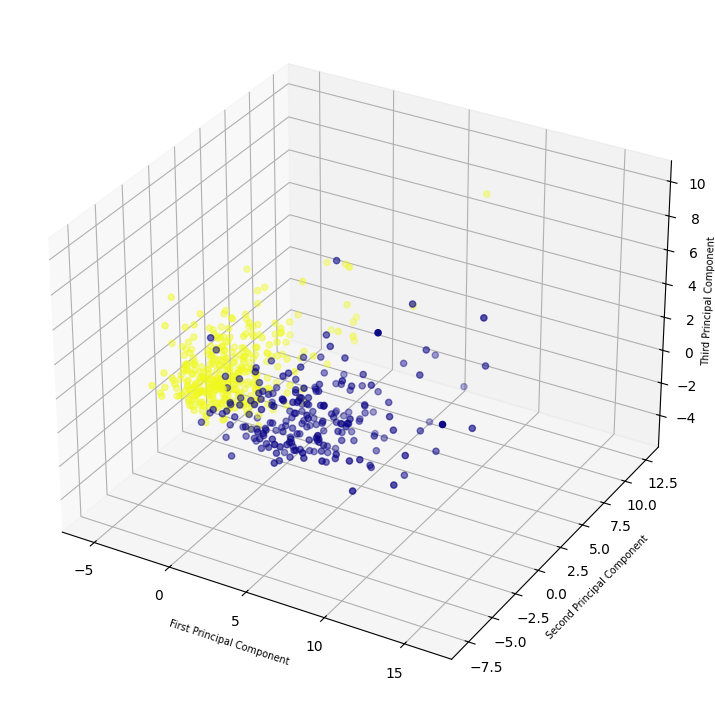

In [17]:
# giving a larger plot
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
 
ax.scatter(x_pca2[:, 0], x_pca2[:, 1], x_pca2[:, 2], cmap='plasma', c=cancer['target'])
 
# labeling x and y axes
ax.set_xlabel('First Principal Component', fontsize=7)
ax.set_ylabel('Second Principal Component', fontsize=7)
ax.set_zlabel('Third Principal Component', fontsize=7)
ax.zaxis.labelpad=-1.5
plt.show()

### Finding the count of components to save 80% of data

In [18]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [19]:
components_counts_80 = np.argmax(explained_var >= 0.80) + 1
components_counts_80

5

In [20]:
u_80 = eigenvectors[:,:components_counts_80]
u_80

array([[ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635],
       [ 0.10372458, -0.05970609,  0.0645499 , -0.60305   ,  0.04946885],
       [ 0.22753729, -0.21518136, -0.00931422,  0.0419831 , -0.03737466],
       [ 0.22099499, -0.23107671,  0.02869953,  0.0534338 , -0.01033125],
       [ 0.14258969,  0.18611302, -0.1042919 ,  0.15938277,  0.36508853],
       [ 0.23928535,  0.15189161, -0.07409157,  0.03179458, -0.01170397],
       [ 0.25840048,  0.06016536,  0.00273384,  0.01912275, -0.08637541],
       [ 0.26085376, -0.0347675 , -0.02556354,  0.06533594,  0.04386103],
       [ 0.13816696,  0.19034877, -0.04023994,  0.06712498,  0.30594143],
       [ 0.06436335,  0.36657547, -0.02257409,  0.04858676,  0.04442436],
       [ 0.20597878, -0.10555215,  0.26848139,  0.09794124,  0.1544565 ],
       [ 0.01742803,  0.08997968,  0.37463367, -0.35985553,  0.19165051],
       [ 0.21132592, -0.08945723,  0.26664537,  0.08899241,  0.12099022],
       [ 0.20286964, -0.15229263,  0.2

In [21]:
pca_component_80 = pd.DataFrame(u_80,
                             index = cancer['feature_names'],
                             columns = [f'PC{i+1}' for i in range(components_counts_80)]
                            )
pca_component_80

,PC1,PC2,PC3,PC4,PC5
mean radius,0.218902,-0.233857,-0.008531,0.041409,-0.037786
mean texture,0.103725,-0.059706,0.064550,-0.603050,0.049469
mean perimeter,0.227537,-0.215181,-0.009314,0.041983,-0.037375
mean area,0.220995,-0.231077,0.028700,0.053434,-0.010331
mean smoothness,0.142590,0.186113,-0.104292,0.159383,0.365089
mean compactness,0.239285,0.151892,-0.074092,0.031795,-0.011704
mean concavity,0.258400,0.060165,0.002734,0.019123,-0.086375
mean concave points,0.260854,-0.034768,-0.025564,0.065336,0.043861
mean symmetry,0.138167,0.190349,-0.040240,0.067125,0.305941
mean fractal dimension,0.064363,0.366575,-0.022574,0.048587,0.044424


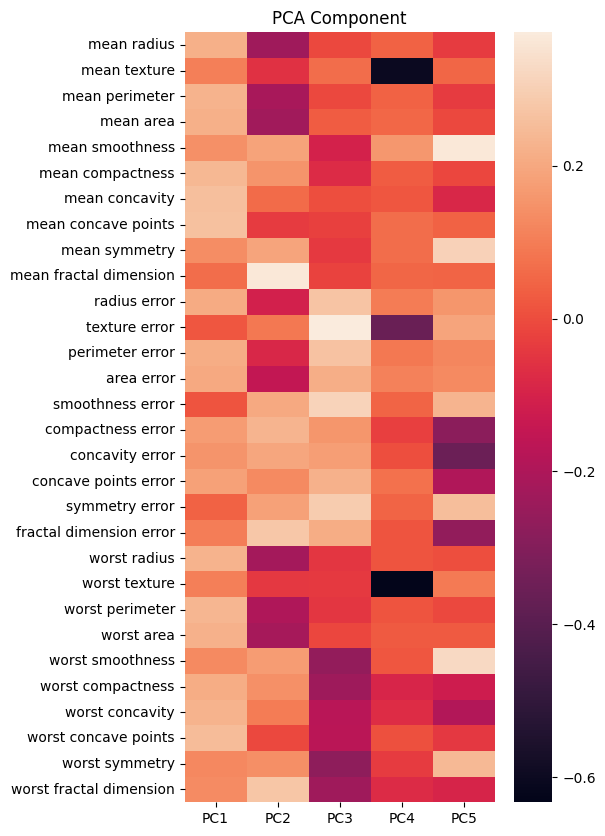

In [22]:
plt.figure(figsize =(5, 10))
sns.heatmap(pca_component_80)
plt.title('PCA Component')
plt.show()

In [23]:
Z_pca_80 = Z @ pca_component_80
# Rename the columns name
Z_pca_80.rename({'PC1': 'PCA1', 'PC2': 'PCA2', 'PC3': 'PCA3', 'PC4': 'PCA4', 'PC5': 'PCA5'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca_80)

          PCA1       PCA2      PCA3      PCA4      PCA5
0     9.184755   1.946870 -1.122179  3.630536  1.194059
1     2.385703  -3.764859 -0.528827  1.117281 -0.621228
2     5.728855  -1.074229 -0.551263  0.911281  0.176930
3     7.116691  10.266556 -3.229948  0.152413  2.958275
4     3.931842  -1.946359  1.388545  2.938054 -0.546267
..         ...        ...       ...       ...       ...
564   6.433655  -3.573673  2.457324  1.176279  0.074759
565   3.790048  -3.580897  2.086640 -2.503825  0.510274
566   1.255075  -1.900624  0.562236 -2.087390 -1.808400
567  10.365673   1.670540 -1.875379 -2.353960  0.033712
568  -5.470430  -0.670047  1.489133 -2.297136  0.184541

[569 rows x 5 columns]
